### Inicio de la práctica 5

Comenzamos primero con los importes necesarios.

In [249]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron, LogisticRegression
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

Para la primera tarea creamos y dividimos los datos.

In [250]:
centers = np.array([[-7,-7],[-2,10],[5,2]])
X, y = make_blobs(n_samples=60, n_features=2,random_state=3, centers=centers)
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=0)

Entrenamos el Perceptron y lo dibujamos.

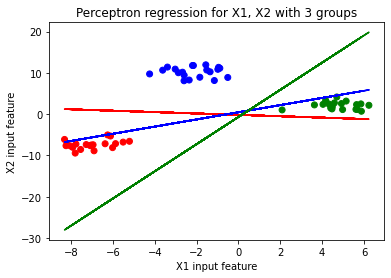

In [251]:
reg = Perceptron()
reg.fit(x_train,y_train)
x1 = X[:, 0]
x2 = X[:, 1]
def colorfunc(value):
    if value == 2: return "green"
    if value == 1: return "blue"
    if value == 0: return "red"

color = [colorfunc(value)  for value in y]

plt.scatter(x1, x2, marker='o', color=color)
plt.xlabel('X1 input feature')
plt.ylabel('X2 input feature')
plt.title('Perceptron regression for X1, X2 with 3 groups')

colors=["red","blue","green"]
for i in range(reg.coef_.shape[0]):
    slope = -(reg.coef_[i][0]/reg.coef_[i][1])
    intercept = -reg.intercept_[i]/reg.coef_[i][1]
    Y = (slope*x1)
    Y+= + intercept
    plt.plot(x1, Y, color = colors[i])

plt.show()

Cada recta tiene el color del conjunto que divide, aparentemente la mayoría de muestras son clasificadas correctamente.

Mismo caso con la Regresión Logistica, le pongo C=5 que es parecido al alpha de L1 y L2, pero este indica de forma inversa. Es decir, cuanto voy a regularizar los datos, es decir, a mayor valor menor regularización.

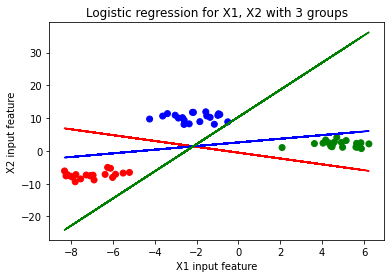

In [252]:
reg2 = LogisticRegression(C=5)
reg2.fit(x_train,y_train)

x1 = X[:, 0]
x2 = X[:, 1]
def colorfunc(value):
    if value == 2: return "green"
    if value == 1: return "blue"
    if value == 0: return "red"


color = [colorfunc(value)  for value in y]


plt.scatter(x1, x2, marker='o', color=color)
plt.xlabel('X1 input feature')
plt.ylabel('X2 input feature')
plt.title('Logistic regression for X1, X2 with 3 groups')

colors=["red","blue","green"]
for i in range(reg2.coef_.shape[0]):
    slope = -(reg2.coef_[i][0]/reg2.coef_[i][1])
    intercept = -reg2.intercept_[i]/reg2.coef_[i][1]
    Y = (slope*x1)
    Y+= + intercept
    plt.plot(x1, Y, color = colors[i])

plt.show()

Cada recta tiene el color del conjunto que divide, aparentemente la mayoría de muestras son clasificadas correctamente.

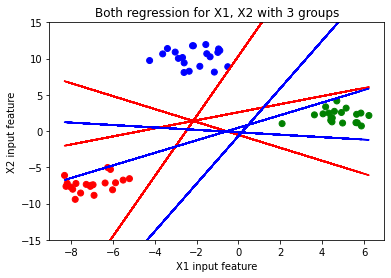

In [253]:
x1 = X[:, 0]
x2 = X[:, 1]
def colorfunc(value):
    if value == 2: return "green"
    if value == 1: return "blue"
    if value == 0: return "red"


color = [colorfunc(value)  for value in y]


plt.scatter(x1, x2, marker='o', color=color)
plt.xlabel('X1 input feature')
plt.ylabel('X2 input feature')
plt.title('Both regression for X1, X2 with 3 groups')

colors=["red","blue","green"]
for i in range(reg2.coef_.shape[0]):
    slope = -(reg2.coef_[i][0]/reg2.coef_[i][1])
    intercept = -reg2.intercept_[i]/reg2.coef_[i][1]
    Y = (slope*x1)
    Y+= + intercept
    plt.plot(x1, Y, color = "red")


for i in range(reg.coef_.shape[0]):
    slope = -(reg.coef_[i][0]/reg.coef_[i][1])
    intercept = -reg.intercept_[i]/reg.coef_[i][1]
    Y = (slope*x1)
    Y+= + intercept

    plt.plot(x1, Y, color = 'blue')
plt.ylim((-15, 15))
plt.show()

Aunqueno se puede ver con mucha claridad, se puede apreciar que todas las rectas se sitúan dividiendo conjunto de muestras evitando estar sobre estas. Por lo tanto, se puede deducir que los modelos son buenos ajustes.

In [254]:
print("El Perceptron clasifica correctamente "+ str(sum(np.equal(reg.predict(x_test),y_test))) +" del conjunto de 18 muestras del test.")

El Perceptron clasifica correctamente 18 del conjunto de 18 muestras del test.


In [255]:
print("La Regression Logística clasifica correctamente "+ str(sum(np.equal(reg2.predict(x_test),y_test))) +" del conjunto de 18 muestras del test.")


La Regression Logística clasifica correctamente 18 del conjunto de 18 muestras del test.


In [256]:
df_train = pd.read_csv("CelebA-10K-train.csv", sep=",")
df_test = pd.read_csv("CelebA-10K-test.csv", sep=",")
trainy = df_train.iloc[: , 1]
trainx = df_train.iloc[: , 2:]
testy = df_test.iloc[:,1]
testx = df_test.iloc[:,2:]

In [257]:
df_train

,Image_name,Gender,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
0,091932.jpg,female,-0.116635,-0.036023,0.119270,-0.118492,-0.011247,0.060698,0.060445,-0.135724,...,0.109374,-0.087184,-0.170514,-0.002174,0.251658,0.019284,0.073426,-0.181623,0.249872,-0.185412
1,107834.jpg,male,0.112001,0.106917,0.103252,0.226382,-0.223111,0.024005,0.061014,-0.057421,...,0.215107,-0.141468,-0.104929,0.106494,0.210237,0.078579,-0.125898,-0.041841,-0.260546,-0.260307
2,110166.jpg,female,-0.088096,-0.059410,0.295710,0.371716,0.257341,-0.023550,0.219391,-0.146221,...,-0.244827,-0.221200,-0.089513,0.087662,-0.097081,0.176293,-0.237461,0.418944,0.229182,-0.059442
3,133978.jpg,male,-0.105558,0.072108,0.112332,0.005667,0.085721,0.035998,0.084216,0.072809,...,-0.015807,0.172591,0.081388,-0.069114,0.034852,-0.098148,-0.020872,0.131987,-0.043374,-0.173870
4,106976.jpg,male,-0.090511,0.340148,0.312473,-0.453379,0.242707,0.068523,-0.004920,0.008697,...,-0.025792,-0.285553,-0.236192,-0.078685,-0.027608,-0.017950,0.004748,0.202833,0.097448,0.000682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,149771.jpg,female,-0.017248,-0.244833,0.054143,0.157598,0.062310,-0.101982,0.072549,-0.030246,...,0.161412,-0.125806,0.441112,-0.046890,0.061824,0.172180,0.117358,0.012974,0.015868,0.220024
4996,034147.jpg,female,0.115476,0.513085,0.031791,-0.205981,0.091470,0.074307,-0.027061,0.085898,...,0.102597,-0.247961,-0.105375,-0.248781,0.212351,0.238651,-0.273913,-0.144001,0.548276,-0.034668
4997,155482.jpg,female,-0.053420,-0.144265,-0.051779,0.121305,-0.119342,0.178383,-0.069233,0.023989,...,0.111765,0.056343,-0.031273,0.093974,0.104615,0.114703,-0.056083,0.103998,0.264410,0.133450
4998,124239.jpg,male,-0.138123,-0.118341,-0.039559,0.105123,-0.096831,0.217801,-0.019922,0.064665,...,-0.258060,0.381526,-0.127875,-0.214676,-0.225984,0.048977,0.047183,0.124691,0.100267,0.191668


In [258]:
reg3 = LogisticRegression()
reg3.fit(trainx,trainy)
print("Clasifica correctamente un " +str(sum(np.equal(reg3.predict(testx), testy )) / testx.shape[0])+" de las muestras del test, lo cuál indica que es un muy buen ajuste.")

Clasifica correctamente un 0.9126 de las muestras del test, lo cuál indica que es un muy buen ajuste.


In [259]:

mypath=".\ImagenesParaClasificar"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
newdf = df_test.loc[df_test['Image_name'].isin(onlyfiles)]

new_y = newdf.iloc[:,1]
new_x= newdf.iloc[:,2:]
print("Clasifica correctamente "+str(sum(np.equal(reg3.predict(new_x),new_y))) +" muestras, no concuerda con la tasa de acierto de un 91% ya que son en total 8 muestras en este test, pero no es importante pues este es un caso concreto.")

Clasifica correctamente 4 muestras, no concuerda con la tasa de acierto de un 91% ya que son en total 8 muestras en este test, pero no es importante pues este es un caso concreto.


In [260]:
pd.DataFrame(data={'Nombre de la imagen': newdf.iloc[:,0], 'Género correcto': new_y, 'Género predicho': reg3.predict(new_x)})

,Nombre de la imagen,Género correcto,Género predicho
828,001182.jpg,male,female
1174,000595.jpg,female,male
1725,000038.jpg,male,male
2647,000767.jpg,female,female
3387,000220.jpg,male,female
3397,000082.jpg,male,male
4225,002185.jpg,male,female
4526,000047.jpg,female,female
